In [5]:
from erddapClient import ERDDAP_Tabledap
import datetime as dt

remoteNDBC = ERDDAP_Tabledap("https://coastwatch.pfeg.noaa.gov/erddap" ,"cwwcNDBCMet")
print(remoteNDBC)

<erddapClient.ERDDAP_Tabledap>
Title:       NDBC Standard Meteorological Buoy Data, 1970-present
Server URL:  https://coastwatch.pfeg.noaa.gov/erddap
Dataset ID:  cwwcNDBCMet
Variables: 
  station (String) 
  longitude (float) 
    Standard name: longitude 
    Units:         degrees_east 
  latitude (float) 
    Standard name: latitude 
    Units:         degrees_north 
  time (double) 
    Standard name: time 
    Units:         seconds since 1970-01-01T00:00:00Z 
  wd (short) 
    Standard name: wind_from_direction 
    Units:         degrees_true 
  wspd (float) 
    Standard name: wind_speed 
    Units:         m s-1 
  gst (float) 
    Standard name: wind_speed_of_gust 
    Units:         m s-1 
  wvht (float) 
    Standard name: sea_surface_wave_significant_height 
    Units:         m 
  dpd (float) 
    Standard name: sea_surface_swell_wave_period 
    Units:         s 
  apd (float) 
    Standard name: sea_surface_swell_wave_period 
    Units:         s 
  mwd (short) 
    St

In [4]:
remoteNDBC.clearQuery()

slice44025 = (
    remoteNDBC.setResultVariables(['time','wtmp'])
    .addConstraint( 'station="44025"' )
    .addConstraint( 'time>=2010-01-01' )
    .addConstraint( {'time<=' : dt.datetime(2020,1,1) } )
    # The getDataFrame  method accepts the same parameters as pandas.read_csv
    .getDataFrame(header=0, names=['time', 'wtmp'], parse_dates=['time'])
)
slice44025

,time,wtmp
0,2010-01-01 00:50:00+00:00,7.8
1,2010-01-01 01:50:00+00:00,7.8
2,2010-01-01 02:50:00+00:00,7.8
3,2010-01-01 03:50:00+00:00,8.0
4,2010-01-01 04:50:00+00:00,7.9
...,...,...
76578,2019-12-31 19:50:00+00:00,9.0
76579,2019-12-31 20:50:00+00:00,9.0
76580,2019-12-31 21:50:00+00:00,9.0
76581,2019-12-31 22:50:00+00:00,9.0


<AxesSubplot:xlabel='time'>

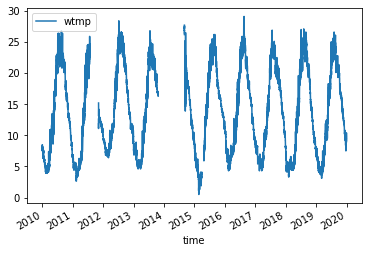

In [6]:
slice44025.plot(x='time', y='wtmp')

In [7]:
remoteNDBC.clearQuery()
# Daily means calculated in erddap server
slice44025 = (
    remoteNDBC.setResultVariables(['time','wtmp'])
    .addConstraint( 'station="44025"' )
    .addConstraint( 'time>=2010-01-01' )
    .addConstraint( 'time<=2020-01-01')
    .orderByMean('time/1day')
    .getDataFrame(header=0, names=['time', 'wtmp'], parse_dates=['time'], index_col='time')
)
slice44025

,wtmp
time,
2010-01-01 00:00:00+00:00,7.837500
2010-01-02 00:00:00+00:00,8.120833
2010-01-03 00:00:00+00:00,8.125000
2010-01-04 00:00:00+00:00,7.761905
2010-01-05 00:00:00+00:00,7.845833
...,...
2019-12-27 00:00:00+00:00,9.279167
2019-12-28 00:00:00+00:00,9.733333
2019-12-29 00:00:00+00:00,9.500000


In [6]:
slice44025['yearday'] = slice44025.index.dayofyear
slice44025

,wtmp,yearday
time,,
2010-01-01 00:00:00+00:00,7.837500,1
2010-01-02 00:00:00+00:00,8.120833,2
2010-01-03 00:00:00+00:00,8.125000,3
2010-01-04 00:00:00+00:00,7.761905,4
2010-01-05 00:00:00+00:00,7.845833,5
...,...,...
2019-12-27 00:00:00+00:00,9.279167,361
2019-12-28 00:00:00+00:00,9.733333,362
2019-12-29 00:00:00+00:00,9.500000,363


In [7]:
# Calcular el ciclo anual
avg_sst = slice44025.wtmp.groupby(slice44025.yearday).mean()
avg_sst

yearday
1      8.641204
2      8.406191
3      8.203402
4      8.065795
5      7.943519
         ...   
362    9.439815
363    9.332689
364    9.163426
365    9.023229
366    9.256250
Name: wtmp, Length: 366, dtype: float64

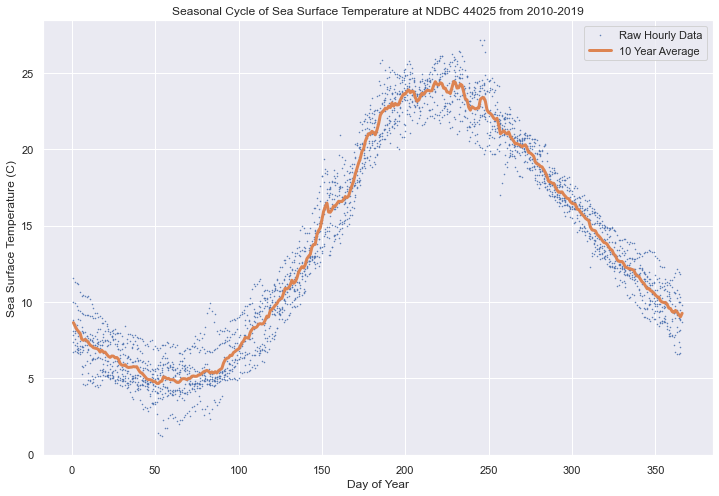

In [8]:
import matplotlib.pyplot as plt
# This makes the plots prettier
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(12,8)})

plt.plot(slice44025.yearday, slice44025.wtmp, '.', markersize=1, label='Raw Hourly Data');
avg_sst.plot(linewidth=3,label='10 Year Average')

plt.legend()
plt.xlabel('Day of Year')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('Seasonal Cycle of Sea Surface Temperature at NDBC 44025 from 2010-2019');